# More data added

In [1]:
import pandas as pd

In [2]:
#import the data
funny3 = pd.read_csv('./csv/funny3_subreddit.csv', index_col=[0])
news3 = pd.read_csv('./csv/news3_subreddit.csv', index_col=[0])
funny2 = pd.read_csv('./csv/funny2_subreddit.csv', index_col=[0])
news2 = pd.read_csv('./csv/news2_subreddit.csv', index_col=[0])
funny = pd.read_csv('./csv/funny_subreddit.csv', index_col=[0])
news = pd.read_csv('./csv/news_subreddit.csv', index_col=[0])

# Data Cleaning / EDA

In [3]:
#looking at the amount of data and shape
funny3.shape, news3.shape, funny2.shape, news2.shape, funny.shape, news.shape

((2474, 2), (2434, 2), (2474, 2), (2426, 2), (2477, 11), (2496, 11))

In [4]:
#merging the data
frames = [news3, funny3, news2, funny2, news, funny]

reddit = pd.concat(frames)

/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [5]:
#checking the merged data
reddit.shape

(14781, 11)

In [6]:
#checking the columns
funny.head(1)

,author_fullname,category,content_categories,id,is_self,name,selftext,subreddit,subreddit_id,suggested_sort,title
0,t2_mz3ih,NaN,NaN,b8l0q4,False,t3_b8l0q4,NaN,funny,t5_2qh33,NaN,Gang Violence Going Down


In [7]:
#checking for missing data
reddit.isnull().sum()

author_fullname        9808
category              14781
content_categories    14781
id                     9808
is_self                9808
name                   9808
selftext              14763
subreddit                 0
subreddit_id           9808
suggested_sort        14781
title                     0
dtype: int64

In [8]:
#dropping columns with null values
reddit = reddit.dropna(axis = 'columns')

In [9]:
reddit.shape

(14781, 2)

In [10]:
#dropping duplicates
reddit = reddit.drop_duplicates()

In [11]:
reddit.shape

(3427, 2)

In [12]:
reddit.isnull().sum()

subreddit    0
title        0
dtype: int64

In [13]:
#inspecting the first data point
reddit['title'][0]

0    Julian Assange to be expelled from Ecuadorian ...
0    I couldn't find the kale at the grocery store....
0                                       Cats on roomba
0                             Gang Violence Going Down
Name: title, dtype: object

In [14]:
# getting two of each subreddit . the index was preserved. resetting index
reddit = reddit.reset_index(drop=True)

In [15]:
# baseline prediction
round(reddit['subreddit'].value_counts(normalize = True)*100,0)

funny        62.0
worldnews    38.0
Name: subreddit, dtype: float64

In [16]:
#binarizing the target outcome
reddit['subreddit'].map({'worldnews': 1,'funny': 0});

In [17]:
#cleaning the data for digits and special characters deemed unnecessary
import re
reddit['title']= reddit['title'].apply(lambda x : re.sub('[0-9,%]', "", x))
reddit['title']

0       Julian Assange to be expelled from Ecuadorian ...
1       Record  of Russians Say They Would Like to Lea...
2       When Mueller submitted his report on Russian i...
3       Trump has reacted angrily to reports members o...
4       The routine vaccination of girls with the HPV ...
5       Ontario considering mandatory annual math test...
6       -star hotels owned by the sultan of Brunei del...
7       Finland’s Basic Income Experiment Shows Recipi...
8       Nearly  tonnes of pangolin scales worth S$ mil...
9              US House votes to end involvement in Yemen
10      BBC News - Brazil text books 'to be revised to...
11      Boeing CEO acknowledges — for the first time —...
12      Great Barrier Reef suffers  collapse in new co...
13      Bad diets killing more people globally than to...
14      Boeing's emergency procedure for runaway stabi...
15      Bavaria to pass 'save the bees' petition into ...
16      Christchurch Mosque shooter charged with  coun...
17      Ethiop

# Modeling

**Create and compare two models**. The Multinomial Bayes classifier and the logistic regression.

In [18]:
# import pipeline, Naive Bays module, among other modules, if need be
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV 

## Creating my features and splitting the dataset for validation

In [19]:
# setting my feature and target
X = reddit['title'].apply(lambda x : re.sub('[0-9,%]', "", x))
y = reddit['subreddit'].map({'worldnews': 1,'funny': 0})

In [20]:
# Import Train, Test, Split Module
from sklearn.model_selection import train_test_split

# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    #stratify = y # did not help.
                                                   )

# Pipeline

The pipeline will consist of two stages: 
  - An instance of CounVectorizer, as it was superior than TFIDF
  - An instance of MNB as it was superior to LinReg. **The columns of X are all integer counts, so MultinomialNB is the best choice here.**

In [21]:
# countVectorizer and Multinomial Naive Bayes are initialized
cvec = CountVectorizer()
lr = LogisticRegression()

In [22]:
# countVectorizer and Multinomial Naive Bayes are instantiated

pipe = Pipeline([
    ('cvec', cvec),
    ('lr',lr)
    ])

In [23]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec = pd.DataFrame(cvec.fit_transform(X_train).todense(),
                            columns = cvec.get_feature_names())

# Transform our testing data with the already-fit CountVectorizer
X_test_cvec = pd.DataFrame(cvec.transform(X_test).todense(),
                            columns = cvec.get_feature_names())

In [24]:
# X_train_cvec [:]>=1
X_train_cvec.head()

,aaron,abandoned,abdelaziz,abdul,able,aboard,about,above,abraham,absolute,...,zia,zigni,zimbabwe,zone,zoo,zoomies,zte,zuckerberg,zuzana,令和
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# finetune model parameters through gridsearch
pipe_params = {
    'cvec__max_features' : [2000, 4000, None],
    'cvec__min_df' : [0, 1, 2],
    'cvec__ngram_range':[(1,1), (1,2)],
    'cvec__analyzer' : ['word'],
    'cvec__tokenizer': [None],
    'cvec__stop_words': ['english']
}
gs = GridSearchCV(pipe, param_grid= pipe_params, cv=3)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9029551258664721,
 {'cvec__analyzer': 'word',
  'cvec__max_features': 4000,
  'cvec__min_df': 0,
  'cvec__ngram_range': (1, 1),
  'cvec__stop_words': 'english',
  'cvec__tokenizer': None})

In [26]:
#score increases if the cell is run over fitted train set. if it is more proper to run it on the train set
cross_val_score(gs, X=X , y=y, cv=3).mean()

/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8867825570883395

In [27]:
# Train and test scores comparison
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9916089018606348, 0.9008746355685131)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
# predictions of real y's
y_preds = gs.predict(X_test)

accuracy_score(y_test, y_preds)

0.9008746355685131

In [30]:
# checking the details of the confusion matrix
confusion_matrix(y_test, y_preds)

array([[403,   1],
       [ 67, 215]])

In [31]:
#constructing the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm = pd.DataFrame(data=cm, columns=['p_Funny', 'p_WNews'], index=['a_Funny', 'a_WNews'])
cm

,p_Funny,p_WNews
a_Funny,403,1
a_WNews,67,215


Text(32.09375, 0.5, 'true values')

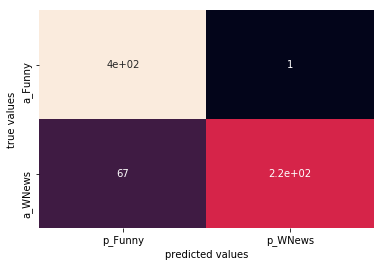

In [36]:
#plotting the confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('predicted values')
plt.ylabel('true values')

In [33]:
#checking the source of model weakness
TP, TN, FP, FN, = 215, 403, 1, 67

Accuracy, Sensitivity, Specificity, Precision  = (TP+TN)/(TP+TN+FP+FN),TP/(TP+FN), TN/(TN+FP), TP/(TP+FP)

print(f'Accuracy: {Accuracy}, Sensitivity: {Sensitivity}, Specificity {Specificity}, Precision {Precision}')

Accuracy: 0.9008746355685131, Sensitivity: 0.7624113475177305, Specificity 0.9975247524752475, Precision 0.9953703703703703


# Live Example

In [34]:
examples = ['school', 'school shooting', 'french', 'french guy', 'mother', 'young mother']

examples_preds = gs.predict(examples)

In [35]:
example_df = pd.DataFrame(examples, examples_preds)
example_df
subreddits_preds = example_df.index.map({1:'worldnews', 0: 'funny'})
example_df= pd.DataFrame({'Example':examples, 'Prediction':subreddits_preds})
example_df

,Example,Prediction
0,school,funny
1,school shooting,funny
2,french,funny
3,french guy,funny
4,mother,funny
5,young mother,funny


# Appendix: tracking earlier versions

### First round: LR vs. MNB

**the outcome of MNB is slightly better for the test set compared to logReg. the gap between the train and test set scores suggests an overfit. 
We could mitigate that by:
  - adding more data
  - using fewer features
  - or try TF-IDF
  - As a last resort try another model
 

### Second round: adding more data  
- with half the data, the test score on the NB model faired better in terms of closing the gap with the train data but still not good enough.

### Third round: using TF-IDF
- the model got worse (test 93 to 90) and the gap still large.

### Fourth round: using Grid search
  - it wasn't better. the model was over fit to the training set which increased to 99.8% while the testing set score dropped to 93.7%